# Enrichment Analysis for Sargassum 
Stage 1. Going to be just loading in the data and prepping it for both analysis.

Stage 2. Will be the script for DESEQ on python. **NumReads**

Stage 3. WGCNA in python and network analysis. **TPM**

## Stage 1: Load and pre-prep data

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pickle as pkl

/Users/Shrini/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/Shrini/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [5]:
# load in main datafile
df = pd.read_csv(r'/Users/Shrini/Desktop/Sargassum/LCC4/LCC4_salmon_output.csv', index_col='Sample')
df

,Length_x,EffectiveLength_x,TPM_ERR3606212_clean_salmon_quant,NumReads_ERR3606212_clean_salmon_quant,Length_y,EffectiveLength_y,TPM_ERR3606213_clean_salmon_quant,NumReads_ERR3606213_clean_salmon_quant,Length_x.1,EffectiveLength_x.1,...,TPM_ERR3606211_clean_salmon_quant,NumReads_ERR3606211_clean_salmon_quant,Length_x.3,EffectiveLength_x.3,TPM_ERR3606214_clean_salmon_quant,NumReads_ERR3606214_clean_salmon_quant,Length_y.3,EffectiveLength_y.3,TPM_ERR3606215_clean_salmon_quant,NumReads_ERR3606215_clean_salmon_quant
Sample,,,,,,,,,,,,,,,,,,,,,
lcl|CACVBO010000001.1_cds_CAA7074040.1_1,141,5.783,0.000000,0.0,141,5.783,90.359825,20.0,141,5.783,...,87.141449,21.0,141,5.783,7.695073,2.0,141,5.783,38.743201,10.0
lcl|CACVBO010000001.1_cds_CAA7074041.1_2,192,9.045,459.974267,171.0,192,9.045,257.093951,89.0,192,9.045,...,267.968238,101.0,192,9.045,312.422974,127.0,192,9.045,245.237659,99.0
lcl|CACVBO010000001.1_cds_CAA7074042.1_3,738,489.000,41.593723,836.0,738,489.000,26.554757,497.0,738,489.000,...,21.052483,429.0,738,489.000,35.672980,784.0,738,489.000,30.102421,657.0
lcl|CACVBO010000001.1_cds_CAA7074043.1_4,1356,1107.000,35.230295,1603.0,1356,1107.000,24.522386,1039.0,1356,1107.000,...,25.709401,1186.0,1356,1107.000,22.109415,1100.0,1356,1107.000,27.019578,1335.0
lcl|CACVBO010000001.1_cds_CAA7074044.1_5,282,37.744,182.418460,283.0,282,37.744,166.133808,240.0,282,37.744,...,174.839504,275.0,282,37.744,173.313142,294.0,282,37.744,216.665497,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lcl|CACVBO010000002.1_cds_CAA7078213.1_4052,411,162.000,2.402898,16.0,411,162.000,4.354553,27.0,411,162.000,...,2.518192,17.0,411,162.000,11.262402,82.0,411,162.000,4.563981,33.0
lcl|CACVBO010000002.1_cds_CAA7078214.1_4053,1092,843.000,0.404046,14.0,1092,843.000,3.254292,105.0,1092,843.000,...,2.647343,93.0,1092,843.000,1.557244,59.0,1092,843.000,5.501583,207.0
lcl|CACVBO010000002.1_cds_CAA7078215.1_4054,879,630.000,0.888214,23.0,879,630.000,1.824765,44.0,879,630.000,...,1.333160,35.0,879,630.000,1.271435,36.0,879,630.000,2.098246,59.0


In [8]:
# clean the overall dataframe since we dont need length columns
columns_to_drop = [col for col in df.columns if 'Length' in col.lower()]

# Drop the columns
df = df.drop(columns=columns_to_drop)
df

,TPM_ERR3606212_clean_salmon_quant,NumReads_ERR3606212_clean_salmon_quant,TPM_ERR3606213_clean_salmon_quant,NumReads_ERR3606213_clean_salmon_quant,TPM_ERR3606216_clean_salmon_quant,NumReads_ERR3606216_clean_salmon_quant,TPM_ERR3606218_clean_salmon_quant,NumReads_ERR3606218_clean_salmon_quant,TPM_ERR3606217_clean_salmon_quant,NumReads_ERR3606217_clean_salmon_quant,TPM_ERR3606211_clean_salmon_quant,NumReads_ERR3606211_clean_salmon_quant,TPM_ERR3606214_clean_salmon_quant,NumReads_ERR3606214_clean_salmon_quant,TPM_ERR3606215_clean_salmon_quant,NumReads_ERR3606215_clean_salmon_quant
Sample,,,,,,,,,,,,,,,,
lcl|CACVBO010000001.1_cds_CAA7074040.1_1,0.000000,0.0,90.359825,20.0,4.351890,1.0,12.947994,3.0,20.424978,5.0,87.141449,21.0,7.695073,2.0,38.743201,10.0
lcl|CACVBO010000001.1_cds_CAA7074041.1_2,459.974267,171.0,257.093951,89.0,297.726973,107.0,328.386013,119.0,292.527087,112.0,267.968238,101.0,312.422974,127.0,245.237659,99.0
lcl|CACVBO010000001.1_cds_CAA7074042.1_3,41.593723,836.0,26.554757,497.0,36.180438,703.0,35.728914,700.0,27.439771,568.0,21.052483,429.0,35.672980,784.0,30.102421,657.0
lcl|CACVBO010000001.1_cds_CAA7074043.1_4,35.230295,1603.0,24.522386,1039.0,20.779061,914.0,22.253594,987.0,22.492307,1054.0,25.709401,1186.0,22.109415,1100.0,27.019578,1335.0
lcl|CACVBO010000001.1_cds_CAA7074044.1_5,182.418460,283.0,166.133808,240.0,162.026333,243.0,185.157217,280.0,168.988345,270.0,174.839504,275.0,173.313142,294.0,216.665497,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lcl|CACVBO010000002.1_cds_CAA7078213.1_4052,2.402898,16.0,4.354553,27.0,11.651279,75.0,8.165664,53.0,7.291149,50.0,2.518192,17.0,11.262402,82.0,4.563981,33.0
lcl|CACVBO010000002.1_cds_CAA7078214.1_4053,0.404046,14.0,3.254292,105.0,2.388305,80.0,0.917835,31.0,1.513238,54.0,2.647343,93.0,1.557244,59.0,5.501583,207.0
lcl|CACVBO010000002.1_cds_CAA7078215.1_4054,0.888214,23.0,1.824765,44.0,1.837573,46.0,0.990444,25.0,1.499894,40.0,1.333160,35.0,1.271435,36.0,2.098246,59.0


In [14]:
# build a TPM dataframe
columns_to_subset = [col for col in df.columns if 'TPM' in col]
# Subset the DataFrame
TPM = df[columns_to_subset]
TPM.columns = [col.replace('TPM_', '').replace('_clean_salmon_quant', '') for col in TPM.columns]
df_TPM = TPM
df_TPM

,ERR3606212,ERR3606213,ERR3606216,ERR3606218,ERR3606217,ERR3606211,ERR3606214,ERR3606215
Sample,,,,,,,,
lcl|CACVBO010000001.1_cds_CAA7074040.1_1,0.000000,90.359825,4.351890,12.947994,20.424978,87.141449,7.695073,38.743201
lcl|CACVBO010000001.1_cds_CAA7074041.1_2,459.974267,257.093951,297.726973,328.386013,292.527087,267.968238,312.422974,245.237659
lcl|CACVBO010000001.1_cds_CAA7074042.1_3,41.593723,26.554757,36.180438,35.728914,27.439771,21.052483,35.672980,30.102421
lcl|CACVBO010000001.1_cds_CAA7074043.1_4,35.230295,24.522386,20.779061,22.253594,22.492307,25.709401,22.109415,27.019578
lcl|CACVBO010000001.1_cds_CAA7074044.1_5,182.418460,166.133808,162.026333,185.157217,168.988345,174.839504,173.313142,216.665497
...,...,...,...,...,...,...,...,...
lcl|CACVBO010000002.1_cds_CAA7078213.1_4052,2.402898,4.354553,11.651279,8.165664,7.291149,2.518192,11.262402,4.563981
lcl|CACVBO010000002.1_cds_CAA7078214.1_4053,0.404046,3.254292,2.388305,0.917835,1.513238,2.647343,1.557244,5.501583
lcl|CACVBO010000002.1_cds_CAA7078215.1_4054,0.888214,1.824765,1.837573,0.990444,1.499894,1.333160,1.271435,2.098246


In [15]:
# prepare a numreads dataset for WGCNA
columns_to_subset = [col for col in df.columns if 'NumReads' in col]
# Subset the DataFrame
NumReads = df[columns_to_subset]
NumReads.columns = [col.replace('NumReads_', '').replace('_clean_salmon_quant', '') for col in TPM.columns]
df_NumReads = NumReads
df_NumReads

,ERR3606212,ERR3606213,ERR3606216,ERR3606218,ERR3606217,ERR3606211,ERR3606214,ERR3606215
Sample,,,,,,,,
lcl|CACVBO010000001.1_cds_CAA7074040.1_1,0.0,20.0,1.0,3.0,5.0,21.0,2.0,10.0
lcl|CACVBO010000001.1_cds_CAA7074041.1_2,171.0,89.0,107.0,119.0,112.0,101.0,127.0,99.0
lcl|CACVBO010000001.1_cds_CAA7074042.1_3,836.0,497.0,703.0,700.0,568.0,429.0,784.0,657.0
lcl|CACVBO010000001.1_cds_CAA7074043.1_4,1603.0,1039.0,914.0,987.0,1054.0,1186.0,1100.0,1335.0
lcl|CACVBO010000001.1_cds_CAA7074044.1_5,283.0,240.0,243.0,280.0,270.0,275.0,294.0,365.0
...,...,...,...,...,...,...,...,...
lcl|CACVBO010000002.1_cds_CAA7078213.1_4052,16.0,27.0,75.0,53.0,50.0,17.0,82.0,33.0
lcl|CACVBO010000002.1_cds_CAA7078214.1_4053,14.0,105.0,80.0,31.0,54.0,93.0,59.0,207.0
lcl|CACVBO010000002.1_cds_CAA7078215.1_4054,23.0,44.0,46.0,25.0,40.0,35.0,36.0,59.0


In [48]:
# load in the metadata 
metadata = pd.read_csv(r'/Users/Shrini/Desktop/Sargassum/LCC4/Lentimonas_metadata.csv', index_col='Sample')
metadata

,Strain,Growth substrate,Timepoint [h],Treatment
Sample,,,,
ERR3606211,Lentimonas' sp. CC4,iota,40,iota_carrageenan_40h
ERR3606212,Lentimonas' sp. CC4,iota,20,iota_carrageenan_20h
ERR3606213,Lentimonas' sp. CC4,Pure,40,pure_fucoidan_40h
ERR3606214,Lentimonas' sp. CC4,Pure,20,pure_fucoidan_20h
ERR3606215,Lentimonas' sp. CC4,Crude,40,crude_fucoidan_40h
ERR3606216,Lentimonas' sp. CC4,Crude,20,crude_fucoidan_20h
ERR3606217,Lentimonas' sp. CC4,Mannose,40,mannose_40h
ERR3606218,Lentimonas' sp. CC4,Mannose,20,mannose_20h


In [26]:
# allow save to be activate 
SAVE = True  # whether to save the outputs of this notebook

if SAVE:
    # Replace this with the path to directory where you would like results to be saved
    OUTPUT_PATH = "/Users/Shrini/Desktop/Sargassum/LCC4"
    os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist

Alright so I've created the necessary dataframes that can be processed next. 

1. For DESEQ a NumReads dataset --> **df_NumReads**

2. For WGCNA a TPM dataset --> **df_TPM**

3. For sample information --> **metadata**

## DESEQ2 (Stage 2) 

In [18]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [20]:
transposed_data = df_NumReads.T
genes_to_keep = transposed_data.columns[transposed_data.sum(axis=0) >= 10]
transposed_data = transposed_data[genes_to_keep]
transposed_data = transposed_data.fillna(0).astype(int).astype(float)
transposed_data

Sample,lcl|CACVBO010000001.1_cds_CAA7074040.1_1,lcl|CACVBO010000001.1_cds_CAA7074041.1_2,lcl|CACVBO010000001.1_cds_CAA7074042.1_3,lcl|CACVBO010000001.1_cds_CAA7074043.1_4,lcl|CACVBO010000001.1_cds_CAA7074044.1_5,lcl|CACVBO010000001.1_cds_CAA7074045.1_6,lcl|CACVBO010000001.1_cds_CAA7074046.1_7,lcl|CACVBO010000001.1_cds_CAA7074047.1_8,lcl|CACVBO010000001.1_cds_CAA7074048.1_9,lcl|CACVBO010000001.1_cds_CAA7074049.1_10,...,lcl|CACVBO010000002.1_cds_CAA7078208.1_4047,lcl|CACVBO010000002.1_cds_CAA7078209.1_4048,lcl|CACVBO010000002.1_cds_CAA7078210.1_4049,lcl|CACVBO010000002.1_cds_CAA7078211.1_4050,lcl|CACVBO010000002.1_cds_CAA7078212.1_4051,lcl|CACVBO010000002.1_cds_CAA7078213.1_4052,lcl|CACVBO010000002.1_cds_CAA7078214.1_4053,lcl|CACVBO010000002.1_cds_CAA7078215.1_4054,lcl|CACVBO010000002.1_cds_CAA7078218.1_4057,lcl|CACVBO010000002.1_cds_CAA7078219.1_4058
ERR3606212,0.0,171.0,836.0,1603.0,283.0,1775.0,1955.0,827.0,1145.0,974.0,...,17.796,414.0,149.0,66.0,20.0,16.0,14.0,23.0,126.0,834.0
ERR3606213,20.0,89.0,497.0,1039.0,240.0,1550.0,2334.0,234.0,940.0,1112.0,...,104.807,324.0,110.0,77.0,35.0,27.0,105.0,44.0,499.0,1205.0
ERR3606216,1.0,107.0,703.0,914.0,243.0,1255.0,1319.0,511.0,1372.0,1013.0,...,24.430,678.0,256.0,112.0,37.0,75.0,80.0,46.0,492.0,1289.0
ERR3606218,3.0,119.0,700.0,987.0,280.0,1210.0,1215.0,506.0,1259.0,897.0,...,19.627,540.0,182.0,102.0,19.0,53.0,31.0,25.0,318.0,634.0
ERR3606217,5.0,112.0,568.0,1054.0,270.0,1189.0,1925.0,382.0,1356.0,931.0,...,54.035,555.0,148.0,100.0,33.0,50.0,54.0,40.0,658.0,913.0
ERR3606211,21.0,101.0,429.0,1186.0,275.0,1455.0,3307.0,211.0,550.0,1141.0,...,257.586,191.0,54.0,33.0,9.0,17.0,93.0,35.0,254.0,890.0
ERR3606214,2.0,127.0,784.0,1100.0,294.0,1325.0,1405.0,523.0,1551.0,1018.0,...,31.444,940.0,309.0,205.0,49.0,82.0,59.0,36.0,519.0,1012.0
ERR3606215,10.0,99.0,657.0,1335.0,365.0,1418.0,2283.0,260.0,1159.0,993.0,...,107.009,330.0,71.0,46.0,21.0,33.0,207.0,59.0,342.0,1017.0


In [49]:
# order the index correctly
print(transposed_data.index)
print(metadata.index)

# Sort indices in transposed_data
transposed_data_sorted = transposed_data.sort_index()

# Sort indices in metadata
metadata_sorted = metadata.sort_index()

# Print sorted indices
print(transposed_data_sorted.index)
print(metadata_sorted.index)

Index(['ERR3606212', 'ERR3606213', 'ERR3606216', 'ERR3606218', 'ERR3606217',
       'ERR3606211', 'ERR3606214', 'ERR3606215'],
      dtype='object')
Index(['ERR3606211', 'ERR3606212', 'ERR3606213', 'ERR3606214', 'ERR3606215',
       'ERR3606216', 'ERR3606217', 'ERR3606218'],
      dtype='object', name='Sample')
Index(['ERR3606211', 'ERR3606212', 'ERR3606213', 'ERR3606214', 'ERR3606215',
       'ERR3606216', 'ERR3606217', 'ERR3606218'],
      dtype='object')
Index(['ERR3606211', 'ERR3606212', 'ERR3606213', 'ERR3606214', 'ERR3606215',
       'ERR3606216', 'ERR3606217', 'ERR3606218'],
      dtype='object', name='Sample')


In [50]:
# Prep DDS dataset
dds = DeseqDataSet(
    counts=transposed_data_sorted,
    metadata=metadata_sorted,
    design_factors=["Growth substrate"],
    refit_cooks=True)

In [51]:
# Run DESEQ2
dds.deseq2()
if SAVE:
    with open(os.path.join(OUTPUT_PATH, "dds.pkl"), "wb") as f:
        pkl.dump(dds, f)

Fitting size factors...
... done in 0.00 seconds.

/Users/Shrini/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/Shrini/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/Shrini/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/Shrini/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'b

In [52]:
# trial code to check if DESEQ2 worked
print(dds.varm["LFC"])

                                             intercept  \
Sample                                                   
lcl|CACVBO010000001.1_cds_CAA7074040.1_1      1.771222   
lcl|CACVBO010000001.1_cds_CAA7074041.1_2      4.605592   
lcl|CACVBO010000001.1_cds_CAA7074042.1_3      6.494852   
lcl|CACVBO010000001.1_cds_CAA7074043.1_4      7.026117   
lcl|CACVBO010000001.1_cds_CAA7074044.1_5      5.719073   
...                                                ...   
lcl|CACVBO010000002.1_cds_CAA7078213.1_4052   3.918357   
lcl|CACVBO010000002.1_cds_CAA7078214.1_4053   4.998539   
lcl|CACVBO010000002.1_cds_CAA7078215.1_4054   3.951507   
lcl|CACVBO010000002.1_cds_CAA7078218.1_4057   5.987032   
lcl|CACVBO010000002.1_cds_CAA7078219.1_4058   7.012151   

                                             Growth substrate_Mannose_vs_Crude  \
Sample                                                                           
lcl|CACVBO010000001.1_cds_CAA7074040.1_1                             -0.409188   

### Generate Stats tables for assessment
**Note**: We use Mannose as the control since that is what is the normal growing thing. 

Look for those that are upregulated in both crude and pure; then those that are unique in both.



In [54]:
stat_res = DeseqStats(dds)
stat_res_Y_vs_X = DeseqStats(dds, contrast=["Growth substrate", "Crude", "Mannose"])
stat_res_Y_vs_X.summary()
res2 = stat_res_Y_vs_X.results_df
res2.to_csv("Crude_fucoidan_vs_mannose.csv")

Running Wald tests...


Log2 fold change & Wald test p-value: Growth substrate Crude vs Mannose
                                                baseMean  log2FoldChange  \
Sample                                                                     
lcl|CACVBO010000001.1_cds_CAA7074040.1_1        9.327832        0.590333   
lcl|CACVBO010000001.1_cds_CAA7074041.1_2      115.315769       -0.171494   
lcl|CACVBO010000001.1_cds_CAA7074042.1_3      637.490336        0.097788   
lcl|CACVBO010000001.1_cds_CAA7074043.1_4     1176.146362        0.177078   
lcl|CACVBO010000001.1_cds_CAA7074044.1_5      287.094438        0.183350   
...                                                  ...             ...   
lcl|CACVBO010000002.1_cds_CAA7078213.1_4052    41.916027        0.002281   
lcl|CACVBO010000002.1_cds_CAA7078214.1_4053    86.752809        1.836823   
lcl|CACVBO010000002.1_cds_CAA7078215.1_4054    39.709308        0.713489   
lcl|CACVBO010000002.1_cds_CAA7078218.1_4057   402.268395       -0.258711   
lcl|CACVBO010000

... done in 0.33 seconds.



## WGCNA (Stage 3)

Remember this uses TPM matrix

In [2]:
import PyWGCNA
#df_NumReads

In [82]:
# prep the file and save, since only a very particular file format is accepted
df_NumReads_tranpose = df_NumReads.transpose()
df_NumReads_tranpose.to_csv("WGCNA_input_LCC4.csv")
df_NumReads_tranpose

Sample,lcl|CACVBO010000001.1_cds_CAA7074040.1_1,lcl|CACVBO010000001.1_cds_CAA7074041.1_2,lcl|CACVBO010000001.1_cds_CAA7074042.1_3,lcl|CACVBO010000001.1_cds_CAA7074043.1_4,lcl|CACVBO010000001.1_cds_CAA7074044.1_5,lcl|CACVBO010000001.1_cds_CAA7074045.1_6,lcl|CACVBO010000001.1_cds_CAA7074046.1_7,lcl|CACVBO010000001.1_cds_CAA7074047.1_8,lcl|CACVBO010000001.1_cds_CAA7074048.1_9,lcl|CACVBO010000001.1_cds_CAA7074049.1_10,...,lcl|CACVBO010000002.1_cds_CAA7078208.1_4047,lcl|CACVBO010000002.1_cds_CAA7078209.1_4048,lcl|CACVBO010000002.1_cds_CAA7078210.1_4049,lcl|CACVBO010000002.1_cds_CAA7078211.1_4050,lcl|CACVBO010000002.1_cds_CAA7078212.1_4051,lcl|CACVBO010000002.1_cds_CAA7078213.1_4052,lcl|CACVBO010000002.1_cds_CAA7078214.1_4053,lcl|CACVBO010000002.1_cds_CAA7078215.1_4054,lcl|CACVBO010000002.1_cds_CAA7078218.1_4057,lcl|CACVBO010000002.1_cds_CAA7078219.1_4058
ERR3606212,0.0,171.0,836.0,1603.0,283.0,1775.0,1955.0,827.0,1145.0,974.0,...,17.796,414.0,149.0,66.0,20.0,16.0,14.0,23.0,126.0,834.0
ERR3606213,20.0,89.0,497.0,1039.0,240.0,1550.0,2334.0,234.0,940.0,1112.0,...,104.807,324.0,110.0,77.0,35.0,27.0,105.0,44.0,499.0,1205.0
ERR3606216,1.0,107.0,703.0,914.0,243.0,1255.0,1319.0,511.0,1372.0,1013.0,...,24.430,678.0,256.0,112.0,37.0,75.0,80.0,46.0,492.0,1289.0
ERR3606218,3.0,119.0,700.0,987.0,280.0,1210.0,1215.0,506.0,1259.0,897.0,...,19.627,540.0,182.0,102.0,19.0,53.0,31.0,25.0,318.0,634.0
ERR3606217,5.0,112.0,568.0,1054.0,270.0,1189.0,1925.0,382.0,1356.0,931.0,...,54.035,555.0,148.0,100.0,33.0,50.0,54.0,40.0,658.0,913.0
ERR3606211,21.0,101.0,429.0,1186.0,275.0,1455.0,3307.0,211.0,550.0,1141.0,...,257.586,191.0,54.0,33.0,9.0,17.0,93.0,35.0,254.0,890.0
ERR3606214,2.0,127.0,784.0,1100.0,294.0,1325.0,1405.0,523.0,1551.0,1018.0,...,31.444,940.0,309.0,205.0,49.0,82.0,59.0,36.0,519.0,1012.0
ERR3606215,10.0,99.0,657.0,1335.0,365.0,1418.0,2283.0,260.0,1159.0,993.0,...,107.009,330.0,71.0,46.0,21.0,33.0,207.0,59.0,342.0,1017.0


In [22]:
# load it back in
WGNCA_input = '/Users/Shrini/Desktop/Sargassum/LCC4/WGCNA_input_LCC4.csv'
pyWGCNA_5xFAD = PyWGCNA.WGCNA(name='5xFAD',
                              species='Lentimonas_LCC4',
                             
                              networkType='signed',
                              geneExpPath=WGNCA_input,  # Pass the transposed dataset
                              outputPath='/Users/Shrini/Desktop/Sargassum/LCC4/',
                              save=True)
pyWGCNA_5xFAD.geneExpr.to_df().astype(int)


Saving data to be True, checking requirements ...


,lcl|CACVBO010000001.1_cds_CAA7074040.1_1,lcl|CACVBO010000001.1_cds_CAA7074041.1_2,lcl|CACVBO010000001.1_cds_CAA7074042.1_3,lcl|CACVBO010000001.1_cds_CAA7074043.1_4,lcl|CACVBO010000001.1_cds_CAA7074044.1_5,lcl|CACVBO010000001.1_cds_CAA7074045.1_6,lcl|CACVBO010000001.1_cds_CAA7074046.1_7,lcl|CACVBO010000001.1_cds_CAA7074047.1_8,lcl|CACVBO010000001.1_cds_CAA7074048.1_9,lcl|CACVBO010000001.1_cds_CAA7074049.1_10,...,lcl|CACVBO010000002.1_cds_CAA7078208.1_4047,lcl|CACVBO010000002.1_cds_CAA7078209.1_4048,lcl|CACVBO010000002.1_cds_CAA7078210.1_4049,lcl|CACVBO010000002.1_cds_CAA7078211.1_4050,lcl|CACVBO010000002.1_cds_CAA7078212.1_4051,lcl|CACVBO010000002.1_cds_CAA7078213.1_4052,lcl|CACVBO010000002.1_cds_CAA7078214.1_4053,lcl|CACVBO010000002.1_cds_CAA7078215.1_4054,lcl|CACVBO010000002.1_cds_CAA7078218.1_4057,lcl|CACVBO010000002.1_cds_CAA7078219.1_4058
ERR3606212,0,171,836,1603,283,1775,1955,827,1145,974,...,17,414,149,66,20,16,14,23,126,834
ERR3606213,20,89,497,1039,240,1550,2334,234,940,1112,...,104,324,110,77,35,27,105,44,499,1205
ERR3606216,1,107,703,914,243,1255,1319,511,1372,1013,...,24,678,256,112,37,75,80,46,492,1289
ERR3606218,3,119,700,987,280,1210,1215,506,1259,897,...,19,540,182,102,19,53,31,25,318,634
ERR3606217,5,112,568,1054,270,1189,1925,382,1356,931,...,54,555,148,100,33,50,54,40,658,913
ERR3606211,21,101,429,1186,275,1455,3307,211,550,1141,...,257,191,54,33,9,17,93,35,254,890
ERR3606214,2,127,784,1100,294,1325,1405,523,1551,1018,...,31,940,309,205,49,82,59,36,519,1012
ERR3606215,10,99,657,1335,365,1418,2283,260,1159,993,...,107,330,71,46,21,33,207,59,342,1017


Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



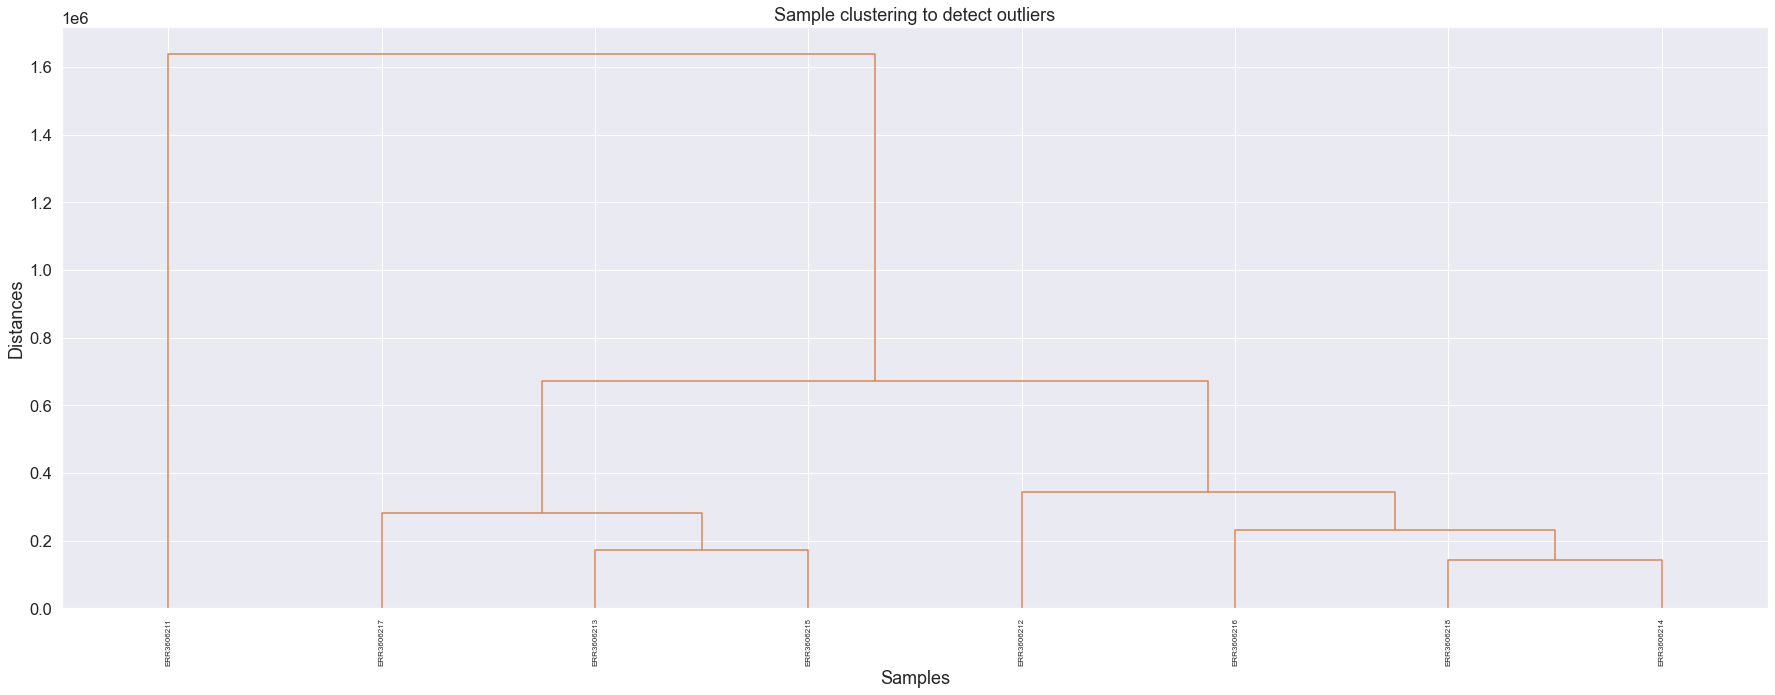

In [23]:
pyWGCNA_5xFAD.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  4049
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.351065  2.057118       0.805767  2199.906264  2359.076111   
1       2  0.281344  1.777083       0.089787  1553.578987  1590.445321   
2       3  0.321762  1.443872        0.25646  1222.376858  1147.276403   
3       4  0.234969   0.80891       0.111425  1016.071383   872.037735   
4       5   0.10583  0.396157      -0.110371   872.774668   690.072683   
5       6  0.018712    0.1273      -0.255694     766.2915    588.65396   
6       7  0.008942 -0.075388      -0.266032   683.473493   511.720509   
7       8  0.087188 -0.207584      -0.131328   616.910409   451.899513   
8       9  0.182327 -0.281907       0.023389   562.066427    404.74658   
9      10  0.285781 -0.356343       0.199254   515.989392   365.368744   
10     11  0.367163 -0.413644       0.341481    476.66485   331.932331   
11     13

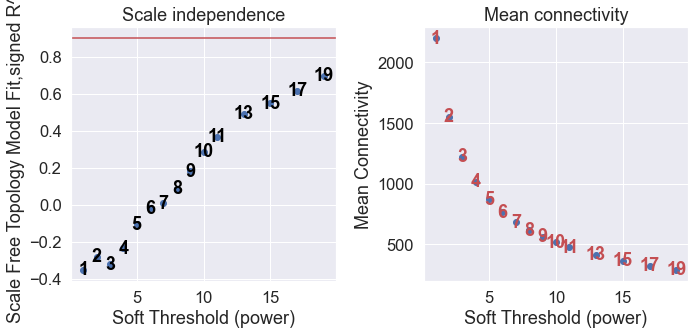

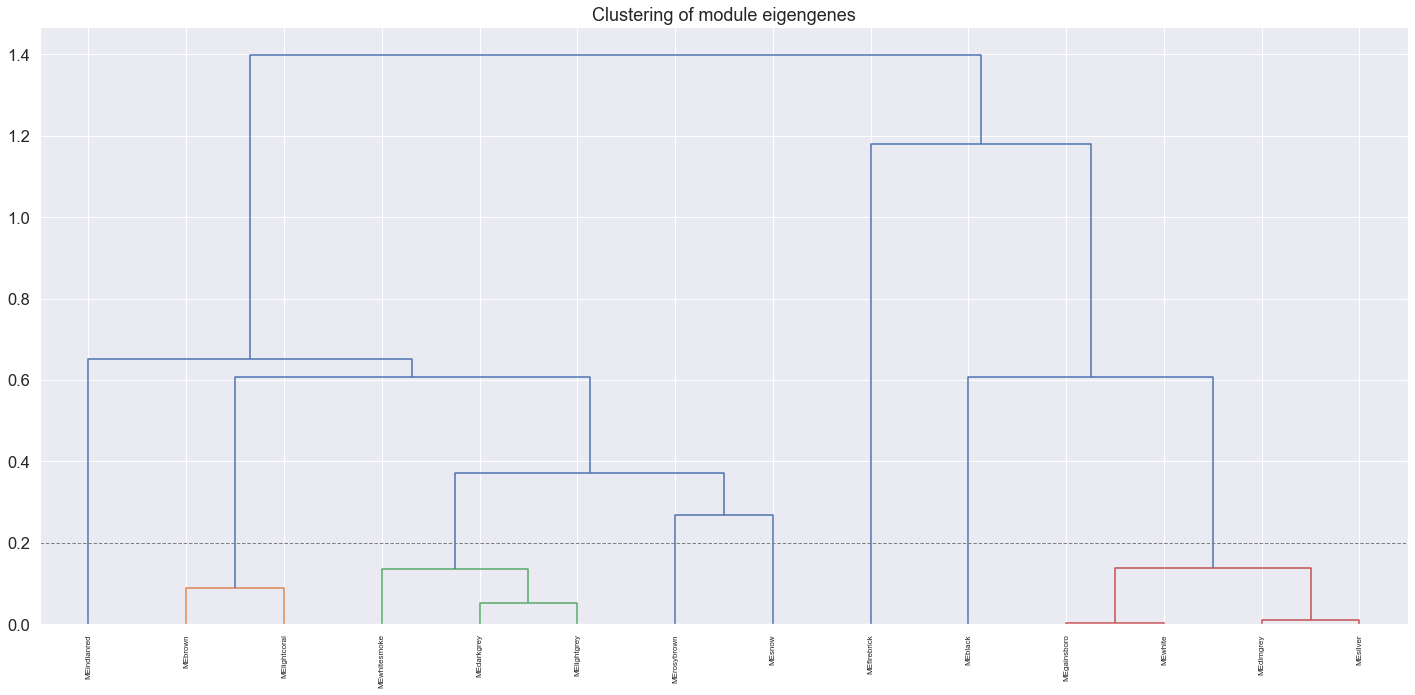

In [24]:
pyWGCNA_5xFAD.findModules()

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...


ValueError: The number of observations cannot be determined on an empty distance matrix.

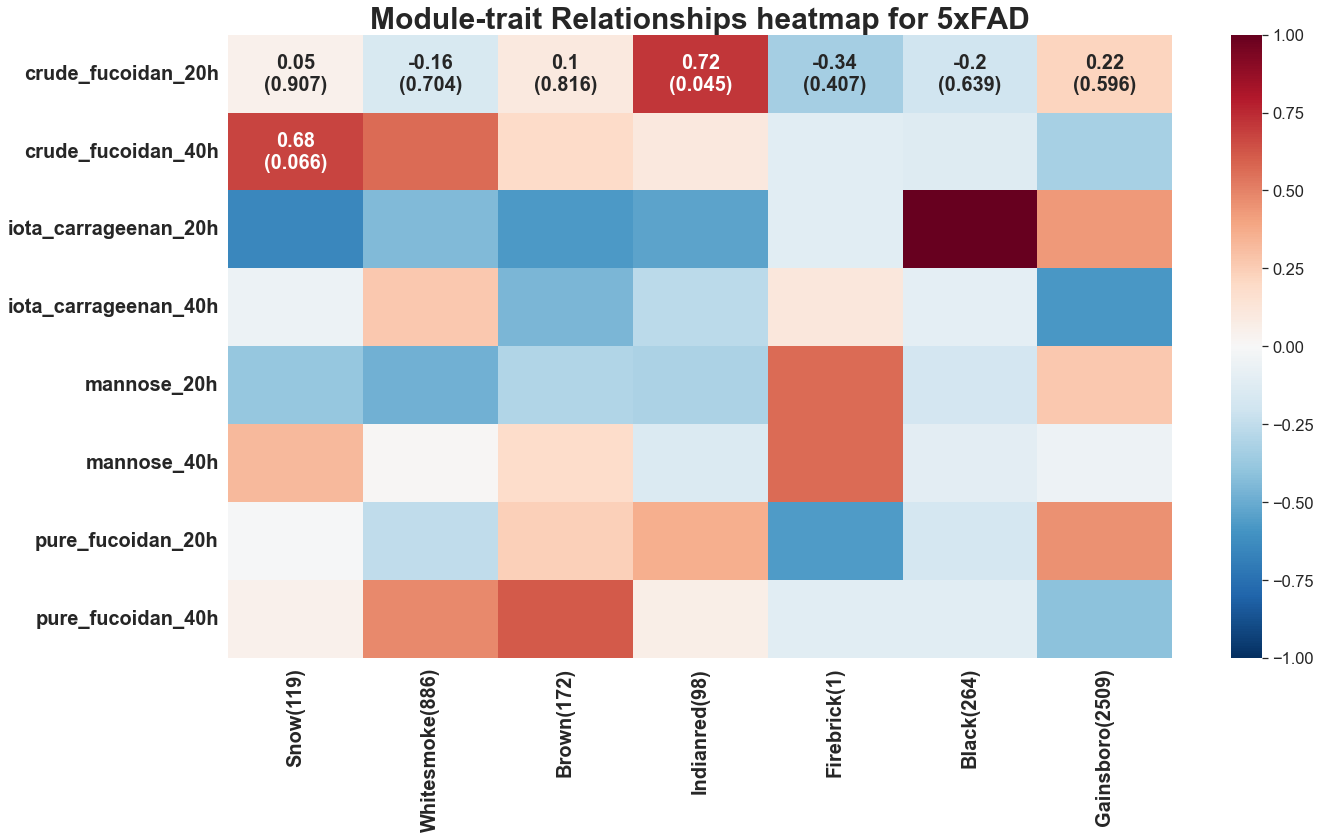

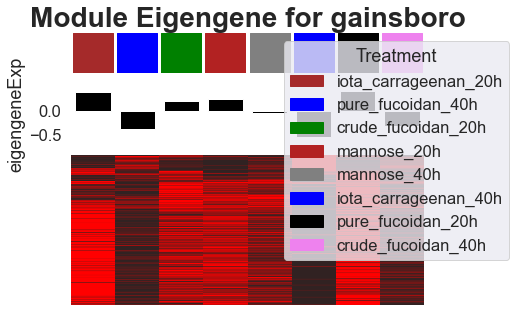

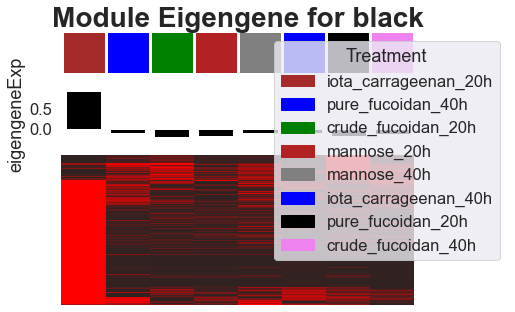

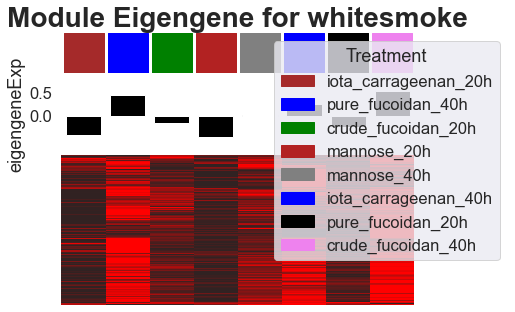

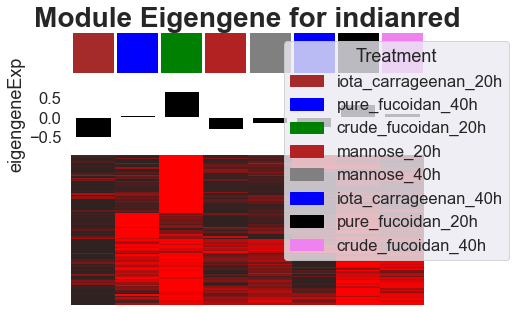

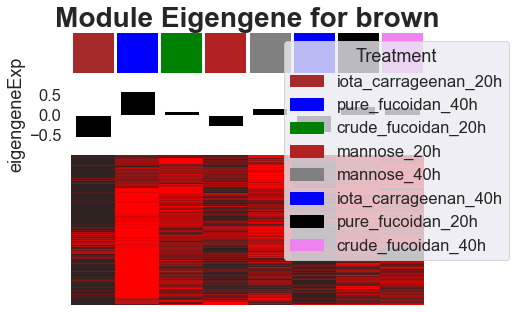

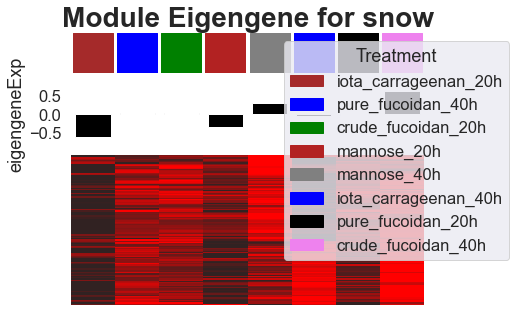

In [38]:
pyWGCNA_5xFAD.analyseWGCNA()


In [40]:
pyWGCNA_5xFAD.updateSampleInfo(path='/Users/Shrini/Desktop/Sargassum/LCC4/Lentimonas_metadata.csv', sep=',')

In [41]:
pyWGCNA_5xFAD.setMetadataColor('Treatment', {'iota_carrageenan_20h': 'Brown', 'pure_fucoidan_40h': 'Blue', 'crude_fucoidan_20h': 'Green',
                                            'mannose_20h': 'firebrick', 'mannose_40h':'grey', 'iota_carrageenan_40h':'blue', 'pure_fucoidan_20h':'black', 'crude_fucoidan_40h':'violet'})

pyWGCNA_5xFAD.geneExpr.obs


,Treatment
ERR3606212,iota_carrageenan_20h
ERR3606213,pure_fucoidan_40h
ERR3606216,crude_fucoidan_20h
ERR3606218,mannose_20h
ERR3606217,mannose_40h
ERR3606211,iota_carrageenan_40h
ERR3606214,pure_fucoidan_20h
ERR3606215,crude_fucoidan_40h


In [42]:
pyWGCNA_5xFAD.saveWGCNA()
#to load 
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")


Saving WGCNA as 5xFAD.p
Reading 5xFAD WGCNA done!


In [43]:
attributes = dir(pyWGCNA_5xFAD)

# Print all attributes
for attribute in attributes:
    print(attribute)

CalculateSignedKME
CoexpressionModulePlot
MEDissThres
MEs
MeanCut
PPI_network
RsquaredCut
TOM
TOMType
TOMsimilarity
TPMcutoff
TomSimilarityFromAdj
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__slotnames__
__str__
__subclasshook__
__weakref__
adjacency
analyseWGCNA
barplotModuleEigenGene
calBlockSize
checkAdjMat
checkAndScaleWeights
checkSets
checkSimilarity
clustOrder
consensusMEDissimilarity
consensusMEDissimilarityMajor
consensusOrderMEs
coreSizeFunc
cut
cutree
cutreeHybrid
datExpr
datME
dynamicMods
equalizeQuantilesFun
figureType
findModules
fixDataStructure
functional_enrichment_analysis
geneExpr
geneTree
getDatTraits
getGeneModule
getModuleName
getModulesGene
get_heights
get_merges
goodGenesFun
goodSamplesFun
goodSamplesGenes
hclust
interpolate
intramodularConnectivity
labels2colors
level
mergeClose

In [44]:
# okay for whatever reason the plots are weird as shit and are not plotting out all the numbers 
pvalue_data=pyWGCNA_5xFAD.moduleTraitPvalue
correlation_data=pyWGCNA_5xFAD.moduleTraitCor
correlation_data

,crude_fucoidan_20h,crude_fucoidan_40h,iota_carrageenan_20h,iota_carrageenan_40h,mannose_20h,mannose_40h,pure_fucoidan_20h,pure_fucoidan_40h
MEsnow,0.049748,0.675415,-0.653260,-0.055119,-0.382839,0.323991,-0.010516,0.052581
MEwhitesmoke,-0.160706,0.569242,-0.442542,0.270809,-0.477832,0.010939,-0.251629,0.481719
MEbrown,0.098632,0.194370,-0.573543,-0.455069,-0.299516,0.179955,0.238431,0.616739
MEindianred,0.718099,0.108801,-0.531736,-0.272366,-0.314364,-0.144072,0.366068,0.069569
MEfirebrick,-0.341882,-0.113961,-0.113961,0.113961,0.569803,0.569803,-0.569803,-0.113961
MEblack,-0.197747,-0.128241,0.995498,-0.094102,-0.180714,-0.106791,-0.175012,-0.112892
MEgainsboro,0.222591,-0.330594,0.432696,-0.585536,0.267226,-0.049463,0.456946,-0.413866


In [45]:
pvalue_data

,crude_fucoidan_20h,crude_fucoidan_40h,iota_carrageenan_20h,iota_carrageenan_40h,mannose_20h,mannose_40h,pure_fucoidan_20h,pure_fucoidan_40h
MEsnow,0.906877,0.066031,7.899693e-02,0.896861,0.349231,0.433691,0.980284,0.901593
MEwhitesmoke,0.703824,0.140826,2.722053e-01,0.516512,0.231099,0.979491,0.547733,0.226780
MEbrown,0.816261,0.644631,1.371686e-01,0.257226,0.471091,0.669798,0.569596,0.103387
MEindianred,0.044832,0.797602,1.749853e-01,0.514008,0.448250,0.733579,0.372476,0.869978
MEfirebrick,0.407171,0.788167,7.881667e-01,0.788167,0.140346,0.140346,0.140346,0.788167
MEblack,0.638777,0.762171,2.273003e-07,0.824597,0.668467,0.801285,0.678491,0.790120
MEgainsboro,0.596223,0.423820,2.842724e-01,0.127250,0.522293,0.907408,0.255019,0.308059


Find hub genes for each module

In [48]:
pyWGCNA_5xFAD.top_n_hub_genes(moduleName="snow", n=10)


calculating adjacency matrix ...
	Done..



,connectivity,dynamicColors,moduleColors,moduleLabels
lcl|CACVBO010000002.1_cds_CAA7077828.1_3687,21.344244,snow,snow,5
lcl|CACVBO010000001.1_cds_CAA7076736.1_2697,21.140564,snow,snow,5
lcl|CACVBO010000001.1_cds_CAA7076715.1_2676,21.098081,snow,snow,5
lcl|CACVBO010000001.1_cds_CAA7076719.1_2680,20.312600,snow,snow,5
lcl|CACVBO010000001.1_cds_CAA7076718.1_2679,19.751271,snow,snow,5
lcl|CACVBO010000001.1_cds_CAA7076724.1_2685,19.715008,snow,snow,5
lcl|CACVBO010000001.1_cds_CAA7076750.1_2711,19.615720,snow,snow,5
lcl|CACVBO010000001.1_cds_CAA7076717.1_2678,19.549433,snow,snow,5
lcl|CACVBO010000002.1_cds_CAA7077801.1_3662,19.184649,snow,snow,5
lcl|CACVBO010000002.1_cds_CAA7077805.1_3665,19.134509,snow,snow,5


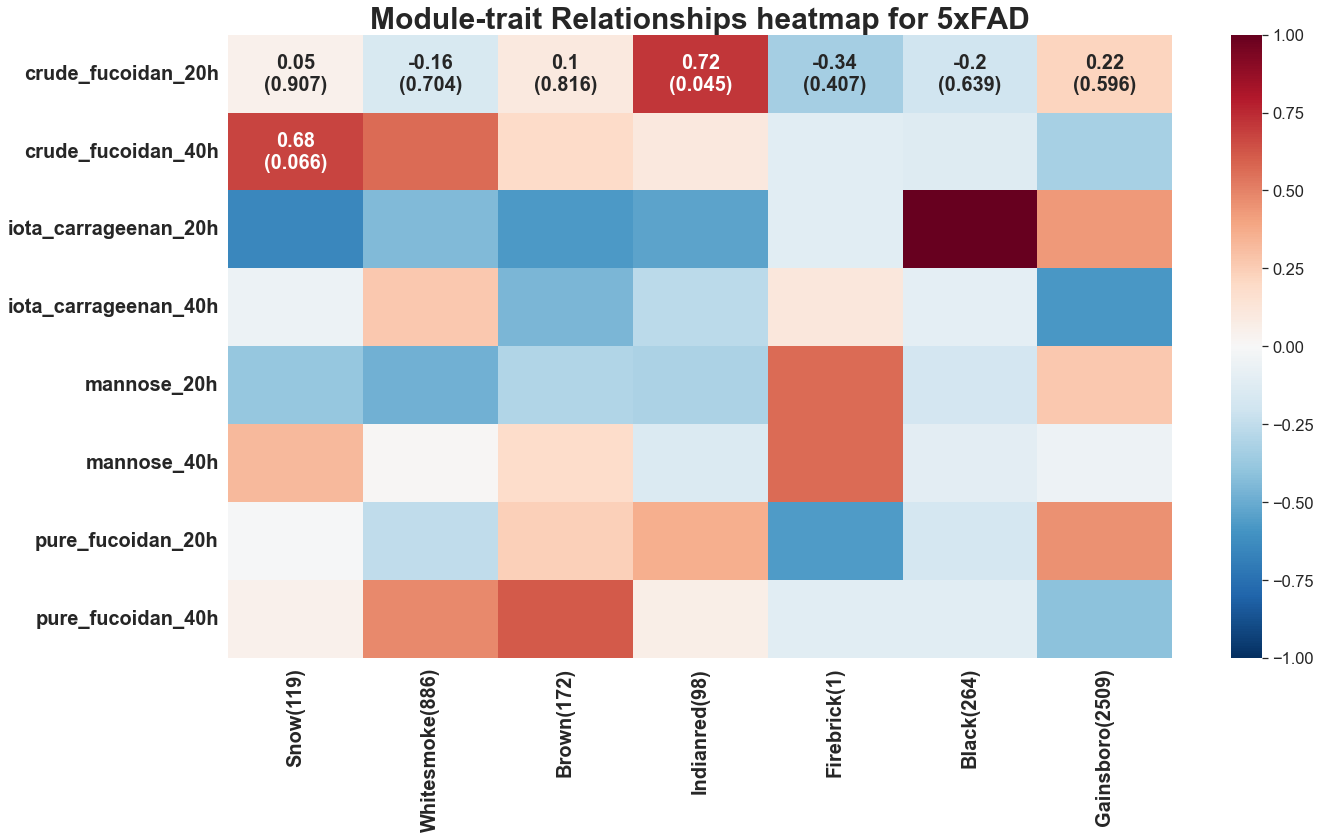

In [49]:
pyWGCNA_5xFAD.module_trait_relationships_heatmap(metaData=['Treatment'])


In [50]:
pyWGCNA_5xFAD.CoexpressionModulePlot(modules=["snow"],numGenes=119, numConnections=100, minTOM=0)


FileNotFoundError: [Errno 2] No such file or directory: './/Users/Shrini/Desktop/Sargassum/LCC4/figures/network/snow.html'

In [105]:
#network analysis (outputs html files for each)
# note its acting weird now 
'''
pyWGCNA_5xFAD.CoexpressionModulePlot(modules=["Darkgrey"], numGenes=229, numConnections=100, minTOM=0)
pyWGCNA_5xFAD.CoexpressionModulePlot(modules=["Lightgrey"], numGenes=522, numConnections=100, minTOM=0)
pyWGCNA_5xFAD.CoexpressionModulePlot(modules=["White"], numGenes=441, numConnections=100, minTOM=0)
pyWGCNA_5xFAD.CoexpressionModulePlot(modules=["Black"], numGenes=894, numConnections=100, minTOM=0)
pyWGCNA_5xFAD.CoexpressionModulePlot(modules=["Dimgrey"], numGenes=1590, numConnections=100, minTOM=0)
pyWGCNA_5xFAD.CoexpressionModulePlot(modules=["Firebrick"], numGenes=104, numConnections=100, minTOM=0)
pyWGCNA_5xFAD.CoexpressionModulePlot(modules=["Gainsboro"], numGenes=156, numConnections=100, minTOM=0)
'''

signedKME is empty! call signedKME() to calculate it


AttributeError: 'NoneType' object has no attribute 'loc'

## Notes
Most associated gene modules with Fucoidans are 
1. Module White (0.46 with Crude and 0.65 with pure).
2. Dark gray 
3. Brown 
All are positively correlated with Fucoidans and late exposure 

### Next Steps
Give the official eggnogg mapper gene names to the genes in question to see what happens and what they are

In [6]:
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")

Reading 5xFAD WGCNA done!


In [7]:
pyWGCNA_5xFAD.top_n_hub_genes(moduleName="white", n=10)


calculating adjacency matrix ...
	Done..



,connectivity,dynamicColors,moduleColors,moduleLabels
lcl|CACVBO010000001.1_cds_CAA7076941.1_2902,70.157038,white,white,7
lcl|CACVBO010000001.1_cds_CAA7077246.1_3207,67.361613,white,white,7
lcl|CACVBO010000001.1_cds_CAA7077313.1_3274,67.139445,white,white,7
lcl|CACVBO010000002.1_cds_CAA7077813.1_3672,66.832955,white,white,7
lcl|CACVBO010000002.1_cds_CAA7078169.1_4011,66.315267,white,white,7
lcl|CACVBO010000001.1_cds_CAA7075471.1_1432,66.146200,white,white,7
lcl|CACVBO010000001.1_cds_CAA7074340.1_301,63.810893,white,white,7
lcl|CACVBO010000001.1_cds_CAA7076134.1_2095,63.697067,white,white,7
lcl|CACVBO010000001.1_cds_CAA7077136.1_3097,63.586289,white,white,7
lcl|CACVBO010000002.1_cds_CAA7077798.1_3659,62.715733,white,white,7


In [16]:
#let's export all modules as a CSV
pyWGCNA_5xFAD.datExpr.var.to_csv("Gene_modules.csv")

In [21]:
# let's load everyone into this party 
Gene_Modules = pd.read_csv(r'/Users/Shrini/Desktop/Sargassum/LCC4/Gene_modules.csv')
annotations = pd.read_csv(r'/Users/Shrini/Desktop/Sargassum/LCC4/LCC4_pacbio_eggnog.csv')
annotations

,Protein,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
0,CAA7074042.1,583355.Caka_0980,3.390000e-92,296.0,"COG0612@1|root,COG0612@2|Bacteria,46S9I@74201|...",414999|Opitutae,S,Insulinase (Peptidase family M16),-,-,...,ko:K07263,-,-,-,-,"ko00000,ko01000,ko01002",-,-,-,"Peptidase_M16,Peptidase_M16_C"
1,CAA7074043.1,583355.Caka_0980,1.800000e-229,658.0,"COG0612@1|root,COG0612@2|Bacteria,46S9I@74201|...",414999|Opitutae,S,Insulinase (Peptidase family M16),-,-,...,ko:K07263,-,-,-,-,"ko00000,ko01000,ko01002",-,-,-,"Peptidase_M16,Peptidase_M16_C"
2,CAA7074046.1,583355.Caka_1127,1.270000e-79,238.0,"2E5IJ@1|root,3309Y@2|Bacteria,46SYV@74201|Verr...",414999|Opitutae,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,CAA7074047.1,583355.Caka_1128,6.350000e-257,716.0,"COG0297@1|root,COG0297@2|Bacteria,46TTT@74201|...",414999|Opitutae,G,Starch synthase catalytic domain,-,-,...,ko:K00703,"ko00500,ko01100,ko01110,ko02026,map00500,map01...",M00565,R02421,RC00005,"ko00000,ko00001,ko00002,ko01000,ko01003",-,GT5,-,"Glyco_transf_5,Glycos_transf_1"
4,CAA7074048.1,583355.Caka_1129,1.310000e-155,446.0,"2A75V@1|root,30W1Q@2|Bacteria,46YTX@74201|Verr...",414999|Opitutae,S,Transmembrane exosortase (Exosortase_EpsH),-,-,...,-,-,-,-,-,-,-,-,-,Exosortase_EpsH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402,CAA7078215.1,509191.AEDB02000043_gene4764,1.960000e-51,177.0,"COG4974@1|root,COG4974@2|Bacteria,1TR57@1239|F...",186801|Clostridia,L,"Phage integrase, N-terminal SAM-like domain",-,-,...,-,-,-,-,-,-,-,-,-,"Phage_int_SAM_4,Phage_integrase"
3403,CAA7078216.1,1121405.dsmv_3800,7.410000e-63,212.0,"COG0517@1|root,COG0517@2|Bacteria,1MXI6@1224|P...",28221|Deltaproteobacteria,S,Putative transposase,-,-,...,-,-,-,-,-,-,-,-,-,"Y2_Tnp,Zn_Tnp_IS91"
3404,CAA7078217.1,509191.AEDB02000043_gene4764,1.960000e-51,177.0,"COG4974@1|root,COG4974@2|Bacteria,1TR57@1239|F...",186801|Clostridia,L,"Phage integrase, N-terminal SAM-like domain",-,-,...,-,-,-,-,-,-,-,-,-,"Phage_int_SAM_4,Phage_integrase"
3405,CAA7078218.1,1123279.ATUS01000001_gene2363,2.550000e-28,107.0,"294UH@1|root,2ZS7P@2|Bacteria,1P8NM@1224|Prote...",1236|Gammaproteobacteria,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [27]:
Gene_Modules['Protein'] = Gene_Modules['Protein'].str.split('_').str[0]
merged_df = pd.merge(Gene_Modules, annotations, on='Protein')

,Protein,dynamicColors,moduleColors,moduleLabels
0,CAA7074040.1,lightgrey,lightgrey,6
1,CAA7074041.1,black,black,0
2,CAA7074042.1,dimgrey,dimgrey,3
3,CAA7074043.1,black,black,0
4,CAA7074044.1,lightgrey,lightgrey,6
...,...,...,...,...
4044,CAA7078213.1,dimgrey,dimgrey,3
4045,CAA7078214.1,dimgrey,dimgrey,3
4046,CAA7078215.1,lightgrey,lightgrey,6
4047,CAA7078218.1,gainsboro,gainsboro,5


# Lets look at DESEQ results

### CRUDE FUCOIDAN

In [51]:
# lets load in the first one Crude fucoidan 
df = pd.read_csv(r'/Users/Shrini/Desktop/Sargassum/LCC4/DESEQ2/Crude_fucoidan_vs_mannose.csv')
df['Protein'] = df['Protein'].str.split('_').str[0]
DESEQ_merged = pd.merge(df, annotations, on='Protein')
DESEQ_merged

,Protein,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,seed_ortholog,evalue,score,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
0,CAA7074042.1,637.490336,0.097788,0.384327,0.254441,0.799155,0.99919,583355.Caka_0980,3.390000e-92,296.0,...,ko:K07263,-,-,-,-,"ko00000,ko01000,ko01002",-,-,-,"Peptidase_M16,Peptidase_M16_C"
1,CAA7074043.1,1176.146362,0.177078,0.508977,0.347909,0.727909,0.99919,583355.Caka_0980,1.800000e-229,658.0,...,ko:K07263,-,-,-,-,"ko00000,ko01000,ko01002",-,-,-,"Peptidase_M16,Peptidase_M16_C"
2,CAA7074046.1,2118.605441,0.249308,0.783309,0.318276,0.750276,0.99919,583355.Caka_1127,1.270000e-79,238.0,...,-,-,-,-,-,-,-,-,-,-
3,CAA7074047.1,411.800256,-0.261727,0.615982,-0.424893,0.670914,0.99919,583355.Caka_1128,6.350000e-257,716.0,...,ko:K00703,"ko00500,ko01100,ko01110,ko02026,map00500,map01...",M00565,R02421,RC00005,"ko00000,ko00001,ko00002,ko01000,ko01003",-,GT5,-,"Glyco_transf_5,Glycos_transf_1"
4,CAA7074048.1,1138.452643,-0.060011,0.367581,-0.163261,0.870313,0.99919,583355.Caka_1129,1.310000e-155,446.0,...,-,-,-,-,-,-,-,-,-,Exosortase_EpsH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,CAA7078210.1,149.745903,-0.116785,0.692669,-0.168601,0.866111,0.99919,382464.ABSI01000016_gene743,3.200000e-08,58.5,...,-,-,-,-,-,-,-,-,-,"Sigma70_r2,Sigma70_r4_2"
3397,CAA7078214.1,86.752809,1.836823,1.100757,1.668690,0.095179,0.99919,1121405.dsmv_3800,7.410000e-63,212.0,...,-,-,-,-,-,-,-,-,-,"Y2_Tnp,Zn_Tnp_IS91"
3398,CAA7078215.1,39.709308,0.713489,0.708215,1.007447,0.313720,0.99919,509191.AEDB02000043_gene4764,1.960000e-51,177.0,...,-,-,-,-,-,-,-,-,-,"Phage_int_SAM_4,Phage_integrase"
3399,CAA7078218.1,402.268395,-0.258711,0.718827,-0.359908,0.718916,0.99919,1123279.ATUS01000001_gene2363,2.550000e-28,107.0,...,-,-,-,-,-,-,-,-,-,-


**Extracting brown module**

In [117]:
brown = merged_df[merged_df['moduleColors'].str.contains('brown')]
list_from_brown = brown['Protein'].tolist()
brown_deseq = DESEQ_merged[DESEQ_merged['Protein'].isin(list_from_brown)]
brown_upreg = brown_deseq[brown_deseq['log2FoldChange'] > 1.0] # interesting to see a lot of them are sulfatases
brown_downreg = brown_deseq[brown_deseq['log2FoldChange'] < -1.0]
brown_upreg.to_csv("Module_brown.csv")

**White module**

In [116]:
white = merged_df[merged_df['moduleColors'].str.contains('white')]
list_from_white = white['Protein'].tolist()
white_deseq = DESEQ_merged[DESEQ_merged['Protein'].isin(list_from_white)]
white_upreg = white_deseq[white_deseq['log2FoldChange'] > 1.0] # interesting to see a lot of them are sulfatases
white_downreg = white_deseq[white_deseq['log2FoldChange'] < -1.0]
white_upreg.to_csv("Module_white.csv")

**Darkgrey**

In [115]:
darkgrey = merged_df[merged_df['moduleColors'].str.contains('darkgrey')]
list_from_darkgrey = darkgrey['Protein'].tolist()
darkgrey_deseq = DESEQ_merged[DESEQ_merged['Protein'].isin(list_from_darkgrey)]
darkgrey_upreg = darkgrey_deseq[darkgrey_deseq['log2FoldChange'] > 1.0] # interesting to see a lot of them are sulfatases
darkgrey_downreg = darkgrey_deseq[darkgrey_deseq['log2FoldChange'] < -1.0]
darkgrey_upreg.to_csv("Module_Darkgrey.csv")


**Notes**
White and darkgrey modules have a significant proportion of sulfatase enzymes (in the upregulated lot)
Darkgrey is our key player since it has the highest correlation (0.69) with the crude fucoidan. 

So far the difference between crude and pure fucoidan appears to be the amount of Sulfur https://www.sigmaaldrich.com/US/en/product/sigma/f5631?utm_source=google&utm_medium=cpc&utm_campaign=10640206247&utm_content=110665358048&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaK2IEhfkpBXipPk23hpFal1sL6ZnOHrjNQ3WlPfUYsFixqlPz5Hv3saAprrEALw_wcB

So it would appear that the crude fucoidan is our study sector of interest. 

### Plot 
Lets do a lineplot for all of the genes in the darkgrey upreg

In [120]:
darkgrey_upreg

,Protein,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,seed_ortholog,evalue,score,...,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
92,CAA7074167.1,1199.060209,1.330443,0.579341,2.296477,0.021649,0.999190,583355.Caka_1649,5.440000e-195,556.0,...,-,-,-,-,-,-,-,-,-,OEP
93,CAA7074168.1,449.332697,1.776782,0.670577,2.649631,0.008058,0.636815,583355.Caka_1648,1.840000e-61,198.0,...,ko:K09017,-,-,-,-,"ko00000,ko03000",-,-,-,TetR_N
142,CAA7074224.1,5899.612663,3.142887,1.291055,2.434355,0.014918,0.999190,391595.RLO149_c020330,7.550000e-04,44.7,...,-,-,-,-,-,-,-,-,-,"EF-hand_1,EF-hand_5"
235,CAA7074329.1,2535.351789,1.245921,0.698690,1.783225,0.074550,0.999190,1123070.KB899257_gene2302,3.120000e-308,840.0,...,-,-,-,-,-,-,-,-,-,-
236,CAA7074330.1,1247.915066,1.266476,0.703351,1.800632,0.071761,0.999190,583355.Caka_1424,1.030000e-278,773.0,...,ko:K00854,"ko00040,ko01100,map00040,map01100",M00014,R01639,"RC00002,RC00538","ko00000,ko00001,ko00002,ko01000",-,-,-,"FGGY_C,FGGY_N"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,CAA7078197.1,2324.600938,1.916458,1.336543,1.433892,0.151603,0.999190,794903.OPIT5_20455,2.300000e-04,50.1,...,-,-,-,-,-,-,-,-,-,-
3388,CAA7078201.1,288.617975,1.141937,0.866430,1.317980,0.187511,0.999190,595460.RRSWK_01426,1.150000e-79,259.0,...,ko:K06999,-,-,-,-,ko00000,-,-,-,"Abhydrolase_5,CarbopepD_reg_2,DUF4139"
3390,CAA7078203.1,131.952508,1.313097,0.938719,1.398818,0.161868,0.999190,595460.RRSWK_04287,1.030000e-288,798.0,...,-,-,-,-,-,-,-,-,-,"Alpha_L_fucos,FIVAR,Glycoamylase,Laminin_G_3"
3392,CAA7078205.1,3168.815051,1.224306,0.834114,1.467793,0.142161,0.999190,595460.RRSWK_04280,0.000000e+00,1318.0,...,ko:K15923,"ko00511,map00511",-,-,-,"ko00000,ko00001,ko01000",-,GH95,-,Glyco_hyd_65N_2


# Cytoscape File Processing 

Load in the file and merge with the eggnogg


In [7]:
nodes = pd.read_csv(r'/Users/Shrini/Desktop/Sargassum/LCC4/CytoscapeInput-nodes-5572_METALgreenyellow-grey-green.csv')
nodes['Protein'] = nodes['Protein'].str.split('_').str[0]
nodes

,nodeName,altName,"nodeAttr[nodesPresent, ]",Protein
0,lcl.CACVBO010000001.1_cds_CAA7074045.1_6,NaN,greenyellow,CAA7074045.1
1,lcl.CACVBO010000001.1_cds_CAA7074046.1_7,NaN,green,CAA7074046.1
2,lcl.CACVBO010000001.1_cds_CAA7074054.1_15,NaN,green,CAA7074054.1
3,lcl.CACVBO010000001.1_cds_CAA7074055.1_16,NaN,green,CAA7074055.1
4,lcl.CACVBO010000001.1_cds_CAA7074065.1_26,NaN,green,CAA7074065.1
...,...,...,...,...
333,lcl.CACVBO010000002.1_cds_CAA7078122.1_3965,NaN,greenyellow,CAA7078122.1
334,lcl.CACVBO010000002.1_cds_CAA7078123.1_3966,NaN,greenyellow,CAA7078123.1
335,lcl.CACVBO010000002.1_cds_CAA7078138.1_3980,NaN,green,CAA7078138.1
336,lcl.CACVBO010000002.1_cds_CAA7078143.1_3985,NaN,greenyellow,CAA7078143.1


In [11]:
annotations = pd.read_csv(r'/Users/Shrini/Desktop/Sargassum/LCC4/LCC4_pacbio_eggnog.csv')
Pfam = annotations[['Protein', 'PFAMs']] 
Pfam

,Protein,PFAMs
0,CAA7074042.1,"Peptidase_M16,Peptidase_M16_C"
1,CAA7074043.1,"Peptidase_M16,Peptidase_M16_C"
2,CAA7074046.1,-
3,CAA7074047.1,"Glyco_transf_5,Glycos_transf_1"
4,CAA7074048.1,Exosortase_EpsH
...,...,...
3402,CAA7078215.1,"Phage_int_SAM_4,Phage_integrase"
3403,CAA7078216.1,"Y2_Tnp,Zn_Tnp_IS91"
3404,CAA7078217.1,"Phage_int_SAM_4,Phage_integrase"
3405,CAA7078218.1,-


In [14]:
# merge the two on protein names
nodes_merged = pd.merge(nodes, Pfam, on='Protein')
nodes_merged.to_csv('merged_nodes.txt', sep='\t', index=False)